<script>
    function findAncestor (el, name) {
        while ((el = el.parentElement) && el.nodeName.toLowerCase() !== name);
        return el;
    }
    function colorAll(el, textColor) {
        el.style.color = textColor;
        Array.from(el.children).forEach((e) => {colorAll(e, textColor);});
    }
    function setBackgroundImage(src, textColor) {
        var section = findAncestor(document.currentScript, 'section');
        if (section) {
            section.setAttribute('data-background-image', src);
			if (textColor) colorAll(section, textColor);
        }
    }
</script>

<style>
h1 {
  border: 1.5px solid #333;
  padding: 8px 12px;
  background-image: linear-gradient(#2774AE,#ebf8e1, #FFD100);
  position: static;
}
</style>

<h1 style='color:white'> Statistics 21 <br/> Python & Other Technologies for Data Science </h1>

<h3 style='color:white'>Vivian Lew, PhD - Friday, Week 6</h3>

<script>
    setBackgroundImage('Window1.jpg');
</script>

# Visual exploration with Seaborn and others

## Week 6 Friday


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

## About Seaborn

- Seaborn is a statistical plotting library with beautiful defaults. 
- Seaborn works well with Pandas dataframe objects
- Seaborn is based on statistical concepts and liked bystatisticians. 
- Seaborn is built on top of Matplotlib and has its plot styles, color defaults, etc.


## More About Seaborn

Seaborn is organized into 3 different "modules" (roughly)

- relational (relplot) 
- distributional (displot)
- categorical (catplot)

and these are cross-cut by plots being classified as axes-level or figure-level

![](seaborn.png)

## Example Data

In [2]:
penguins = sns.load_dataset("penguins")
type(penguins)

pandas.core.frame.DataFrame

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Example: axes level displot default

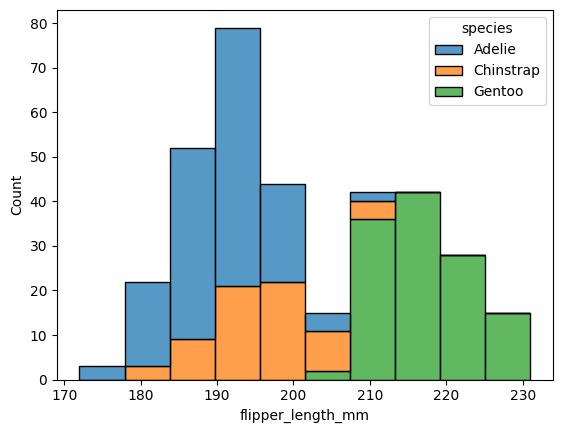

In [4]:
sns.histplot(data=penguins, 
             x="flipper_length_mm", 
             hue="species", multiple="stack");

## Example: modified histogram

Notice in Matplotlib we would use 'hbar', but the philosophy of plotting is different in Seaborn - ask for the flipper length to be on the y-axis.

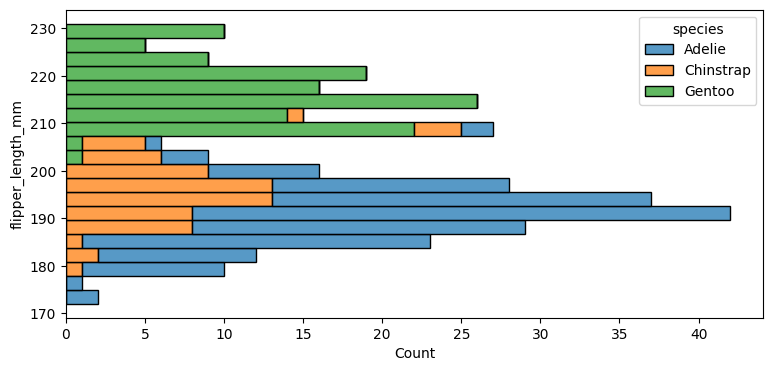

In [5]:
plt.figure(figsize=(9, 4));
sns.histplot(data = penguins, hue="species", multiple="stack",
            y = "flipper_length_mm", bins = 20);

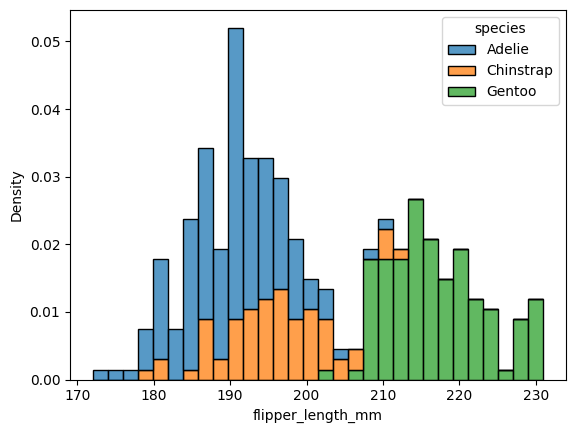

In [6]:
# technically histograms should have density not count
sns.histplot(data = penguins, 
            x = "flipper_length_mm", 
            hue="species", multiple="stack",
            bins = 30, stat = "density");


## Example: axes level kdeplot

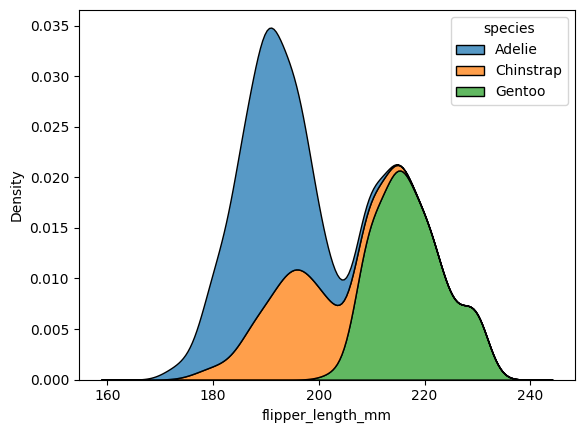

In [7]:
sns.kdeplot(data=penguins, 
            x="flipper_length_mm", 
            hue="species", 
            multiple="stack");

## Adding a kde to the histogram

A graphic like this might not have a name, but you can create it with the tools available in Seaborn.

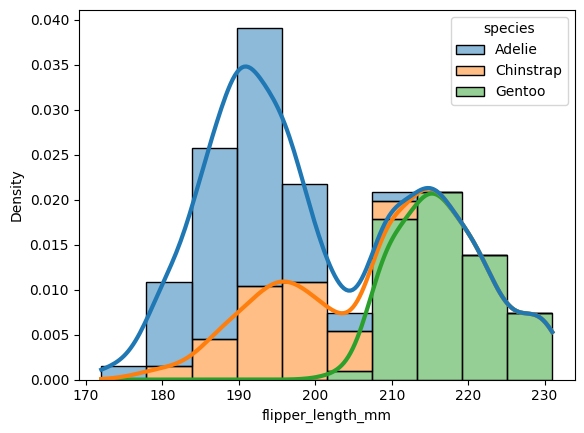

In [8]:
# you can add a kernel density estimate curve
sns.histplot(data = penguins, 
            x = "flipper_length_mm", stat = "density",
            hue="species", multiple="stack",
            kde = True, line_kws= {'linewidth' : 3});


## Kernel density estimation

- The goal of density estimation is determining the probability density function using a set of given data points. 
- We observe points and we want to determine the underlying probability density function generating our points.
- KDE is a function which smoothes each data point into a small densities and then sums all these together to obtain the final density estimate.
- KDE plus a rugplot can show us this

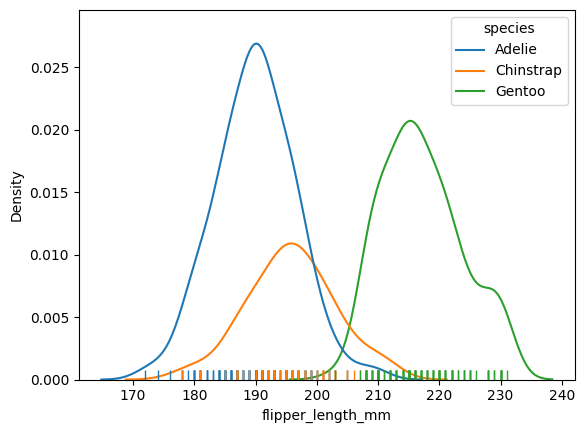

In [9]:
sns.kdeplot(data = penguins, 
            x = "flipper_length_mm", hue="species")
sns.rugplot(data=penguins, 
            x="flipper_length_mm", hue="species")

plt.show()

## ECDF 

- means “Empirical Cumulative Distribution Function”
- not theoretical function but one based on observations, the actual data
- it is a Cumulative Distribution so it answers the question "what proportion is at or below some level"
- we can use the median for example (0.50)

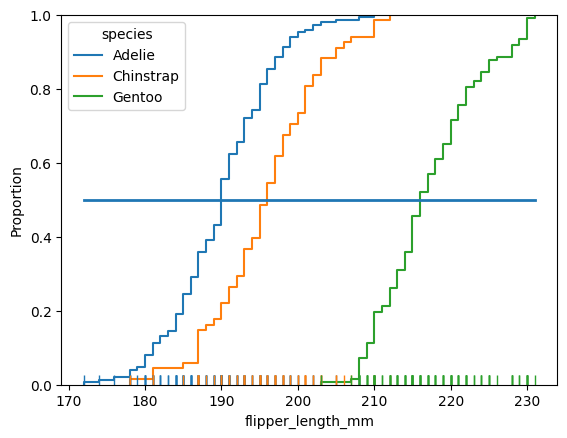

In [10]:
M = penguins["flipper_length_mm"].max()
m = penguins["flipper_length_mm"].min()
sns.ecdfplot(data = penguins, 
             x = "flipper_length_mm", hue="species")
sns.rugplot(data=penguins, 
            x="flipper_length_mm", hue="species")

plt.plot([m, M], [0.5, 0.5], linewidth=2);

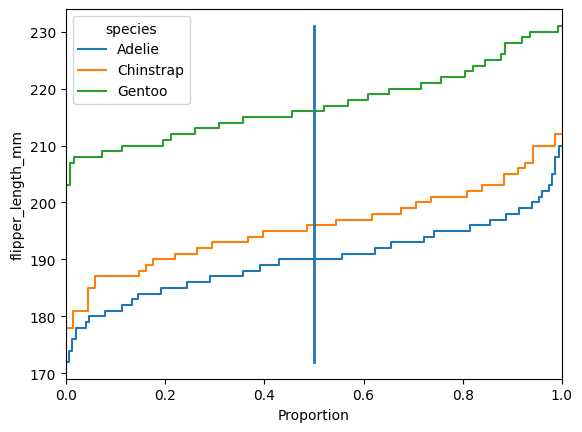

In [11]:
# empirical quantile plot (think QQ plot)
M = penguins["flipper_length_mm"].max()
m = penguins["flipper_length_mm"].min()
sns.ecdfplot(data = penguins, 
             y = "flipper_length_mm", hue="species")

plt.plot([0.5, 0.5],[m, M],  linewidth=2);

## Simple bivariate scatterplot

We can plot by species using colors (hue) and markers (style).  To customize the markers, we provide a dictionary.

In [12]:
%%script false --no-raise-error
plt.figure(figsize=(10, 8))
s = sns.scatterplot(data = penguins, 
                x = "flipper_length_mm", y = "bill_length_mm", 
                hue="species", style="species",
                markers={"Adelie": "s", "Chinstrap": "X", "Gentoo": "o"})
sns.move_legend(s, "lower right")

#plt.savefig("bivariate.png")

![bivariate](bivariate.png)

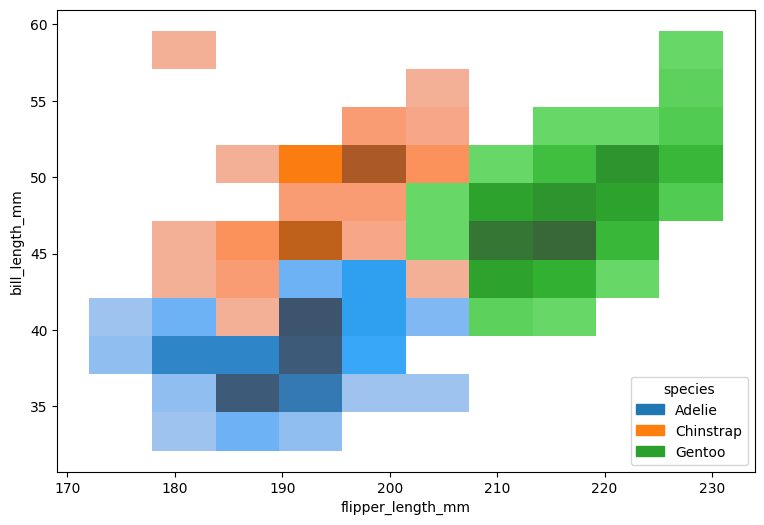

In [13]:
# an alternative
plt.figure(figsize=(9, 6))
s = sns.histplot(data = penguins, hue="species",
            x = "flipper_length_mm", y = "bill_length_mm")
sns.move_legend(s, "lower right")

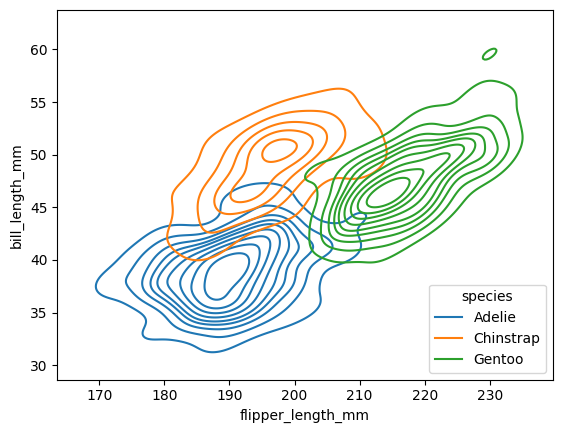

In [14]:
# or
s = sns.kdeplot(data = penguins, 
                x = "flipper_length_mm", y = "bill_length_mm",
                hue="species")
sns.move_legend(s, "lower right")

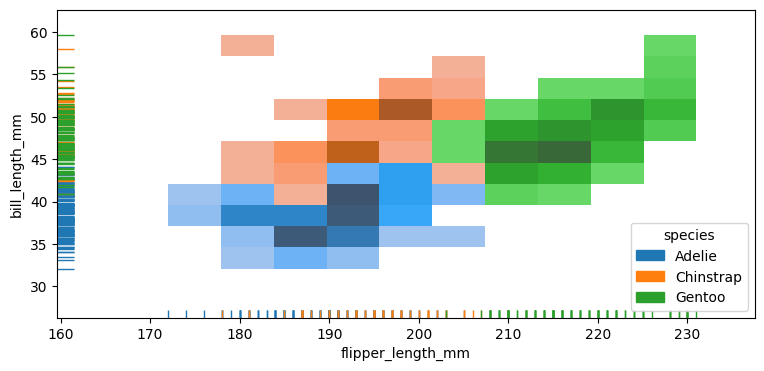

In [15]:
plt.figure(figsize=(9, 4))
s = sns.histplot(data = penguins, 
            x = "flipper_length_mm", y = "bill_length_mm",
            hue = "species")
sns.rugplot(data=penguins, 
            x="flipper_length_mm", hue="species", legend = False)
sns.rugplot(data=penguins, 
            y = "bill_length_mm", hue="species", legend = False)
sns.move_legend(s, "lower right")
plt.plot();

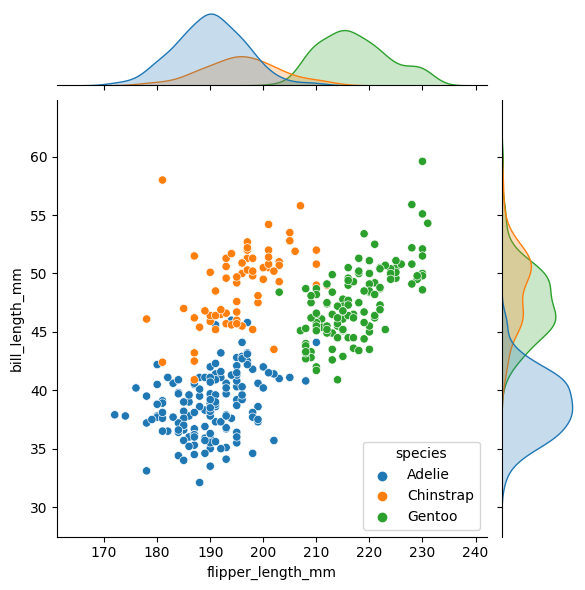

In [16]:
sns.jointplot(data = penguins, 
              x = "flipper_length_mm", y = "bill_length_mm",
              hue = "species");

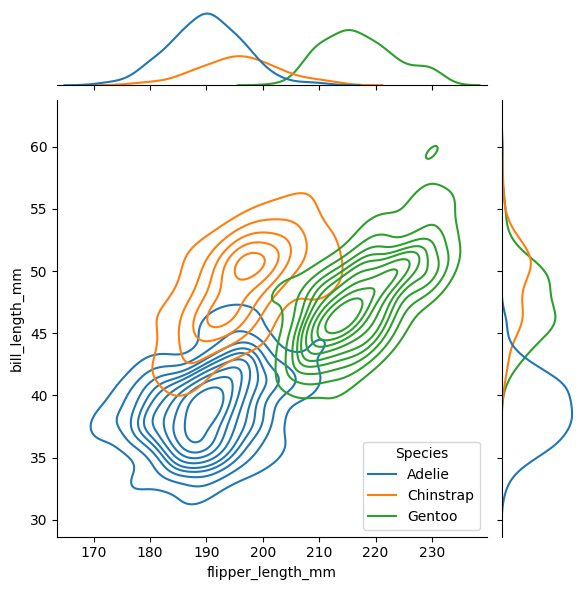

In [17]:
g = sns.jointplot(data = penguins, 
              x = "flipper_length_mm", y = "bill_length_mm", 
              hue = "species", kind = "kde");
sns.move_legend(g.ax_joint, "lower right", 
                title='Species')


## Pair-wise plots for multiple numeric data variables

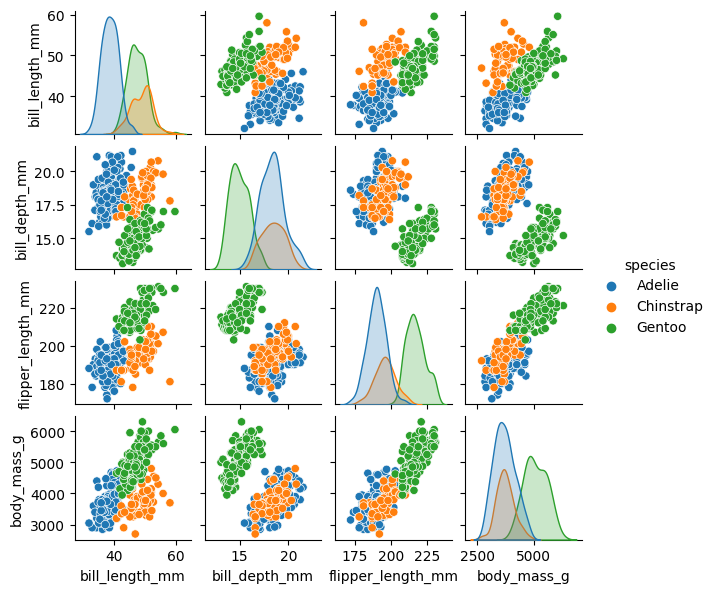

In [18]:
sns.pairplot(penguins, hue = "species", height=1.5);

## Univariate plots separated by category

In [19]:
tips = sns.load_dataset("tips")
tips.head(10)
# tips data, contains numeric vars: total_bill, tip, size
# categorical vars: sex, smoker, day, time

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [20]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


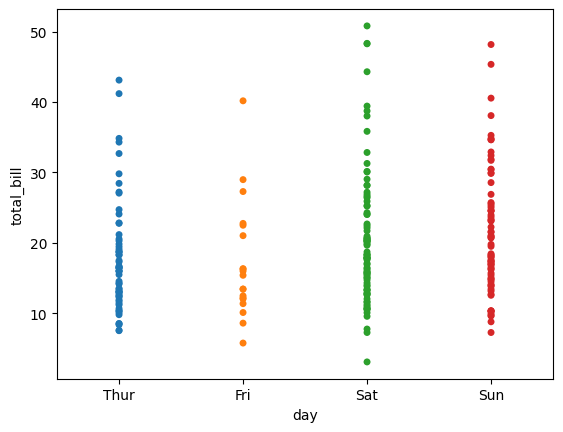

In [21]:
sns.stripplot(x = "day", y = "total_bill", 
              data = tips, jitter = False, 
              hue = "day", legend = False);  
# like a dotplot, but the dots are plotted on top of each other

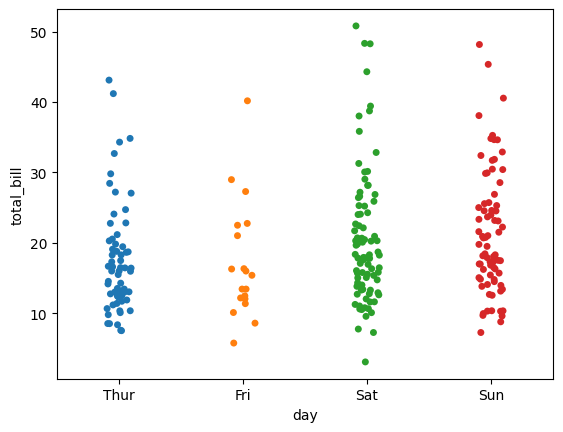

In [22]:
sns.stripplot(x = "day", y = "total_bill", 
              hue = "day", legend = False,
              data = tips, jitter = True);
# adding jitter allows us to see where points were overlapping

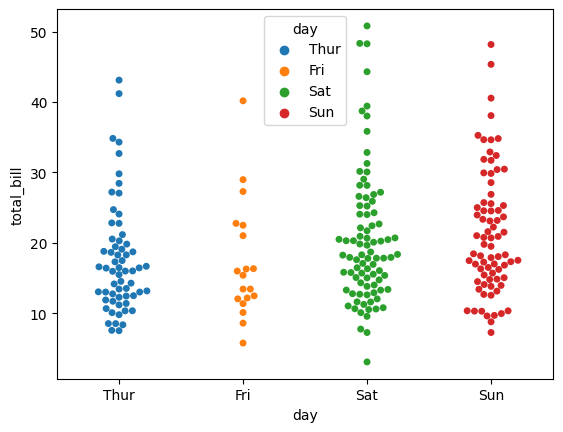

In [23]:
sns.swarmplot(x = "day", y = "total_bill", 
              data=tips, hue = "day");
# swarmplots are like symmetric dotplots

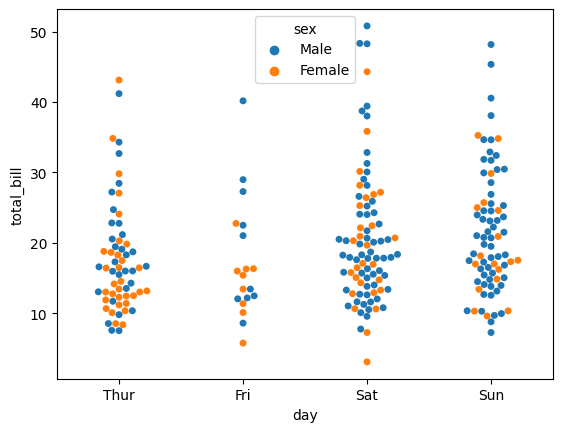

In [24]:
sns.swarmplot(x = "day", y = "total_bill", 
              hue = "sex", data = tips);
# you can change the color of the point based on another categorical variable
# seaborn automatically adds a legend

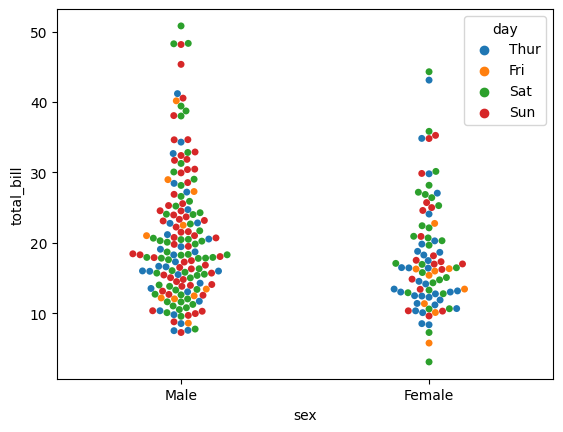

In [25]:
sns.swarmplot(x = "sex", y = "total_bill", 
              hue = "day", data = tips) ;
# this plot is harder on the eyes, but contains the same info as above
# the data is separated based on sex and colored based on the day
# but the colors aren't helping me

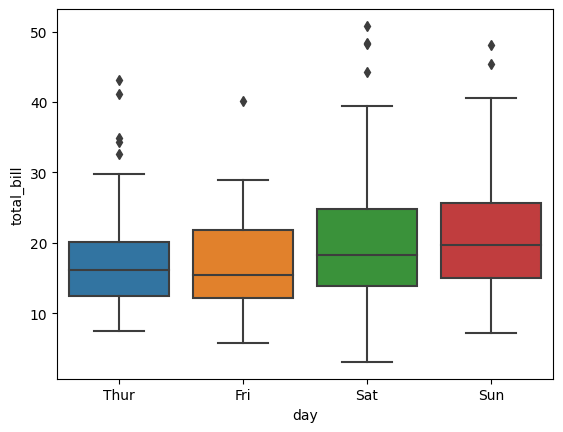

In [26]:
sns.boxplot(x = "day", y = "total_bill", 
            data = tips);

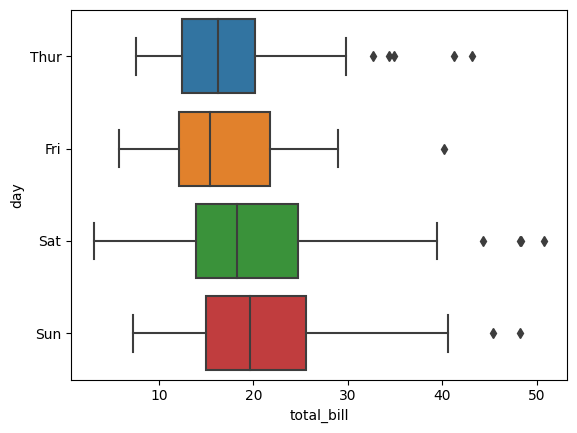

In [27]:
sns.boxplot(y = "day", x = "total_bill", 
            data = tips); 

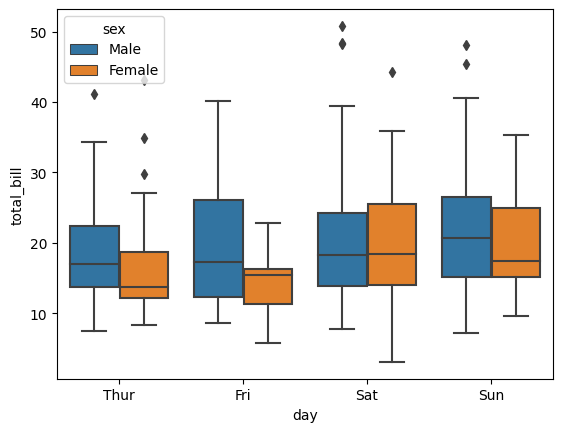

In [28]:
sns.boxplot(x = "day", y = "total_bill", 
            hue = "sex", data = tips); 

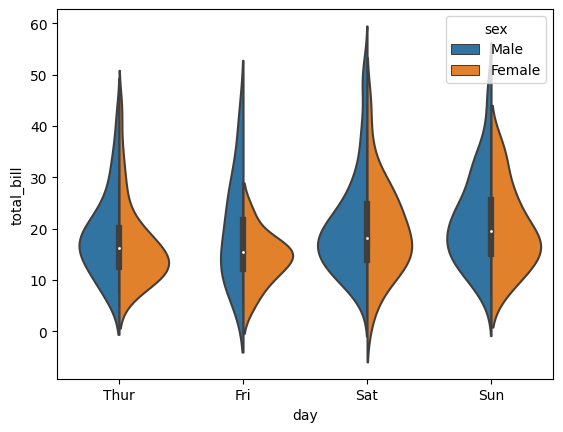

In [29]:
sns.violinplot(x = "day", y = "total_bill",
               hue = "sex", data = tips, split=True);

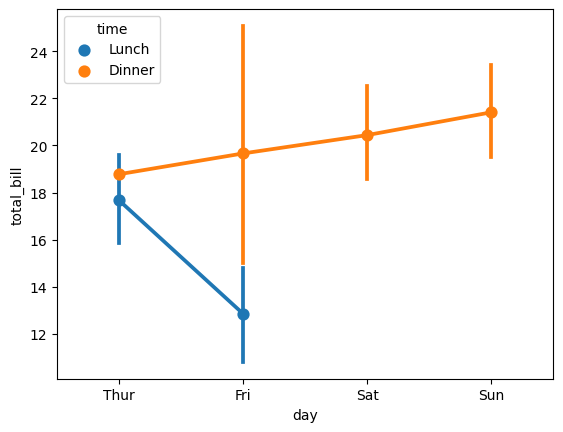

In [30]:
sns.pointplot(x = "day", y = "total_bill", 
              hue = "time", data = tips);

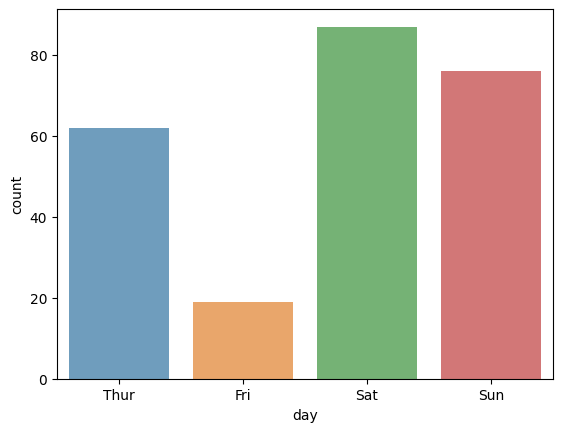

In [31]:
sns.countplot(x = "day", alpha = 0.7, data = tips);

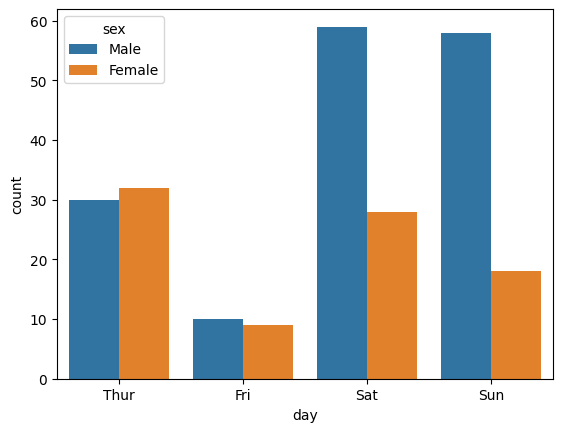

In [32]:
sns.countplot(x = "day", hue = "sex", data = tips);

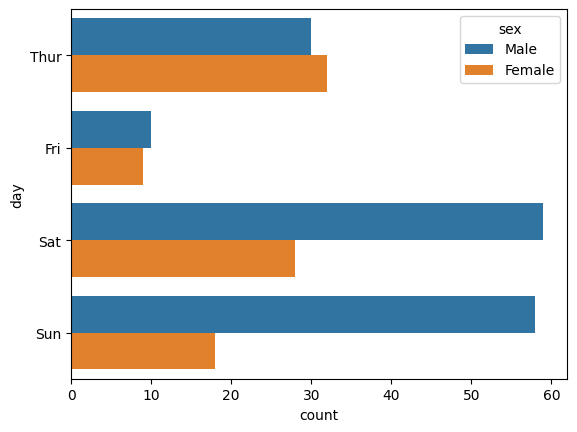

In [33]:
sns.countplot(y = "day", hue = "sex", data = tips);

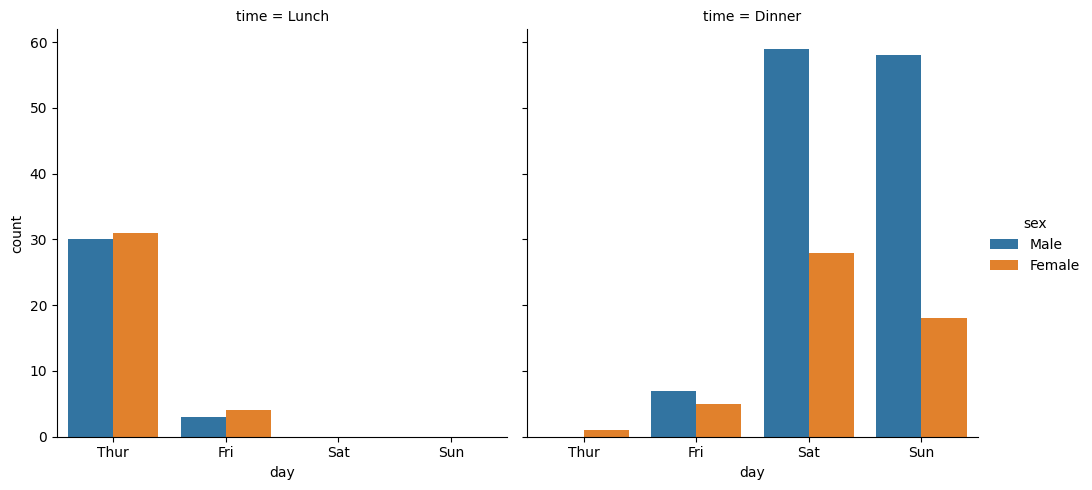

In [34]:
sns.catplot(x = "day", hue = "sex", 
            col = "time", kind = "count", data = tips);

## Facet grids to make several plots

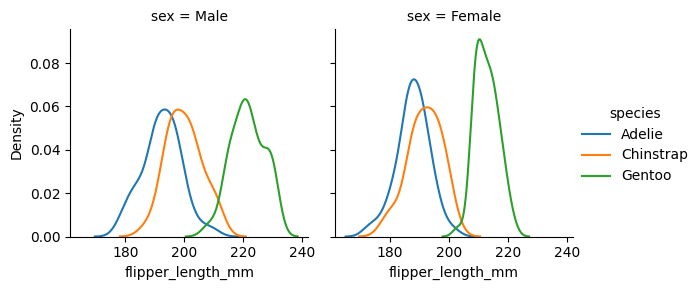

In [35]:
# Create a FacetGrid with "sex" as the columns
g = sns.FacetGrid(penguins, col="sex", hue="species")

# Map a kdeplot onto each facet
g.map(sns.kdeplot, "flipper_length_mm")

# Add a legend
g.add_legend()

plt.show()

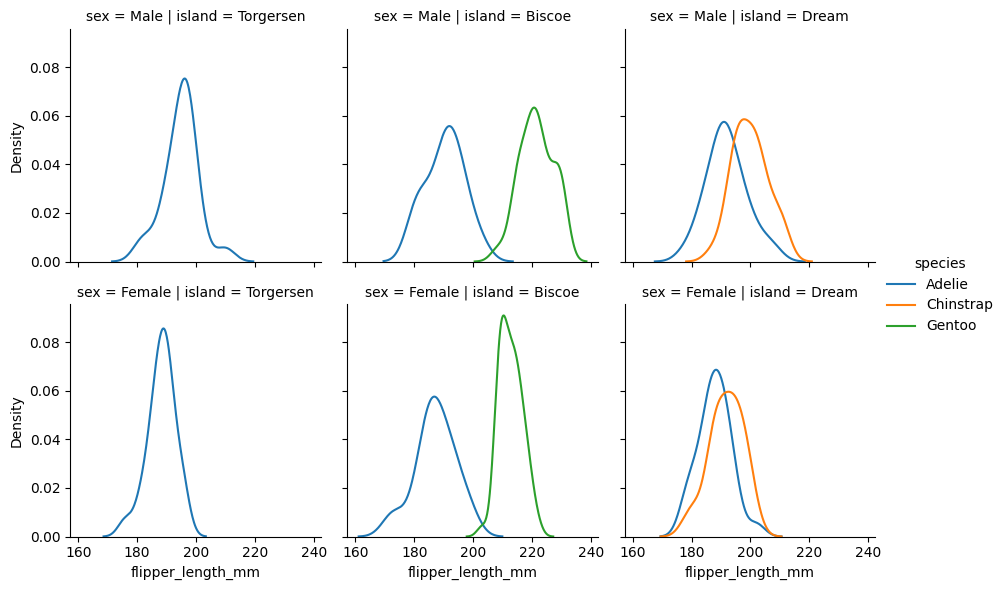

In [36]:
# Create a FacetGrid with "sex" on the rows and islands the columns
g = sns.FacetGrid(penguins, row="sex", 
                  col="island", hue="species")

# Map a kdeplot onto each facet
g.map(sns.kdeplot, "flipper_length_mm")

# Add a legend
g.add_legend()

plt.show()

but some functions, like lmplot() have faceting built in:

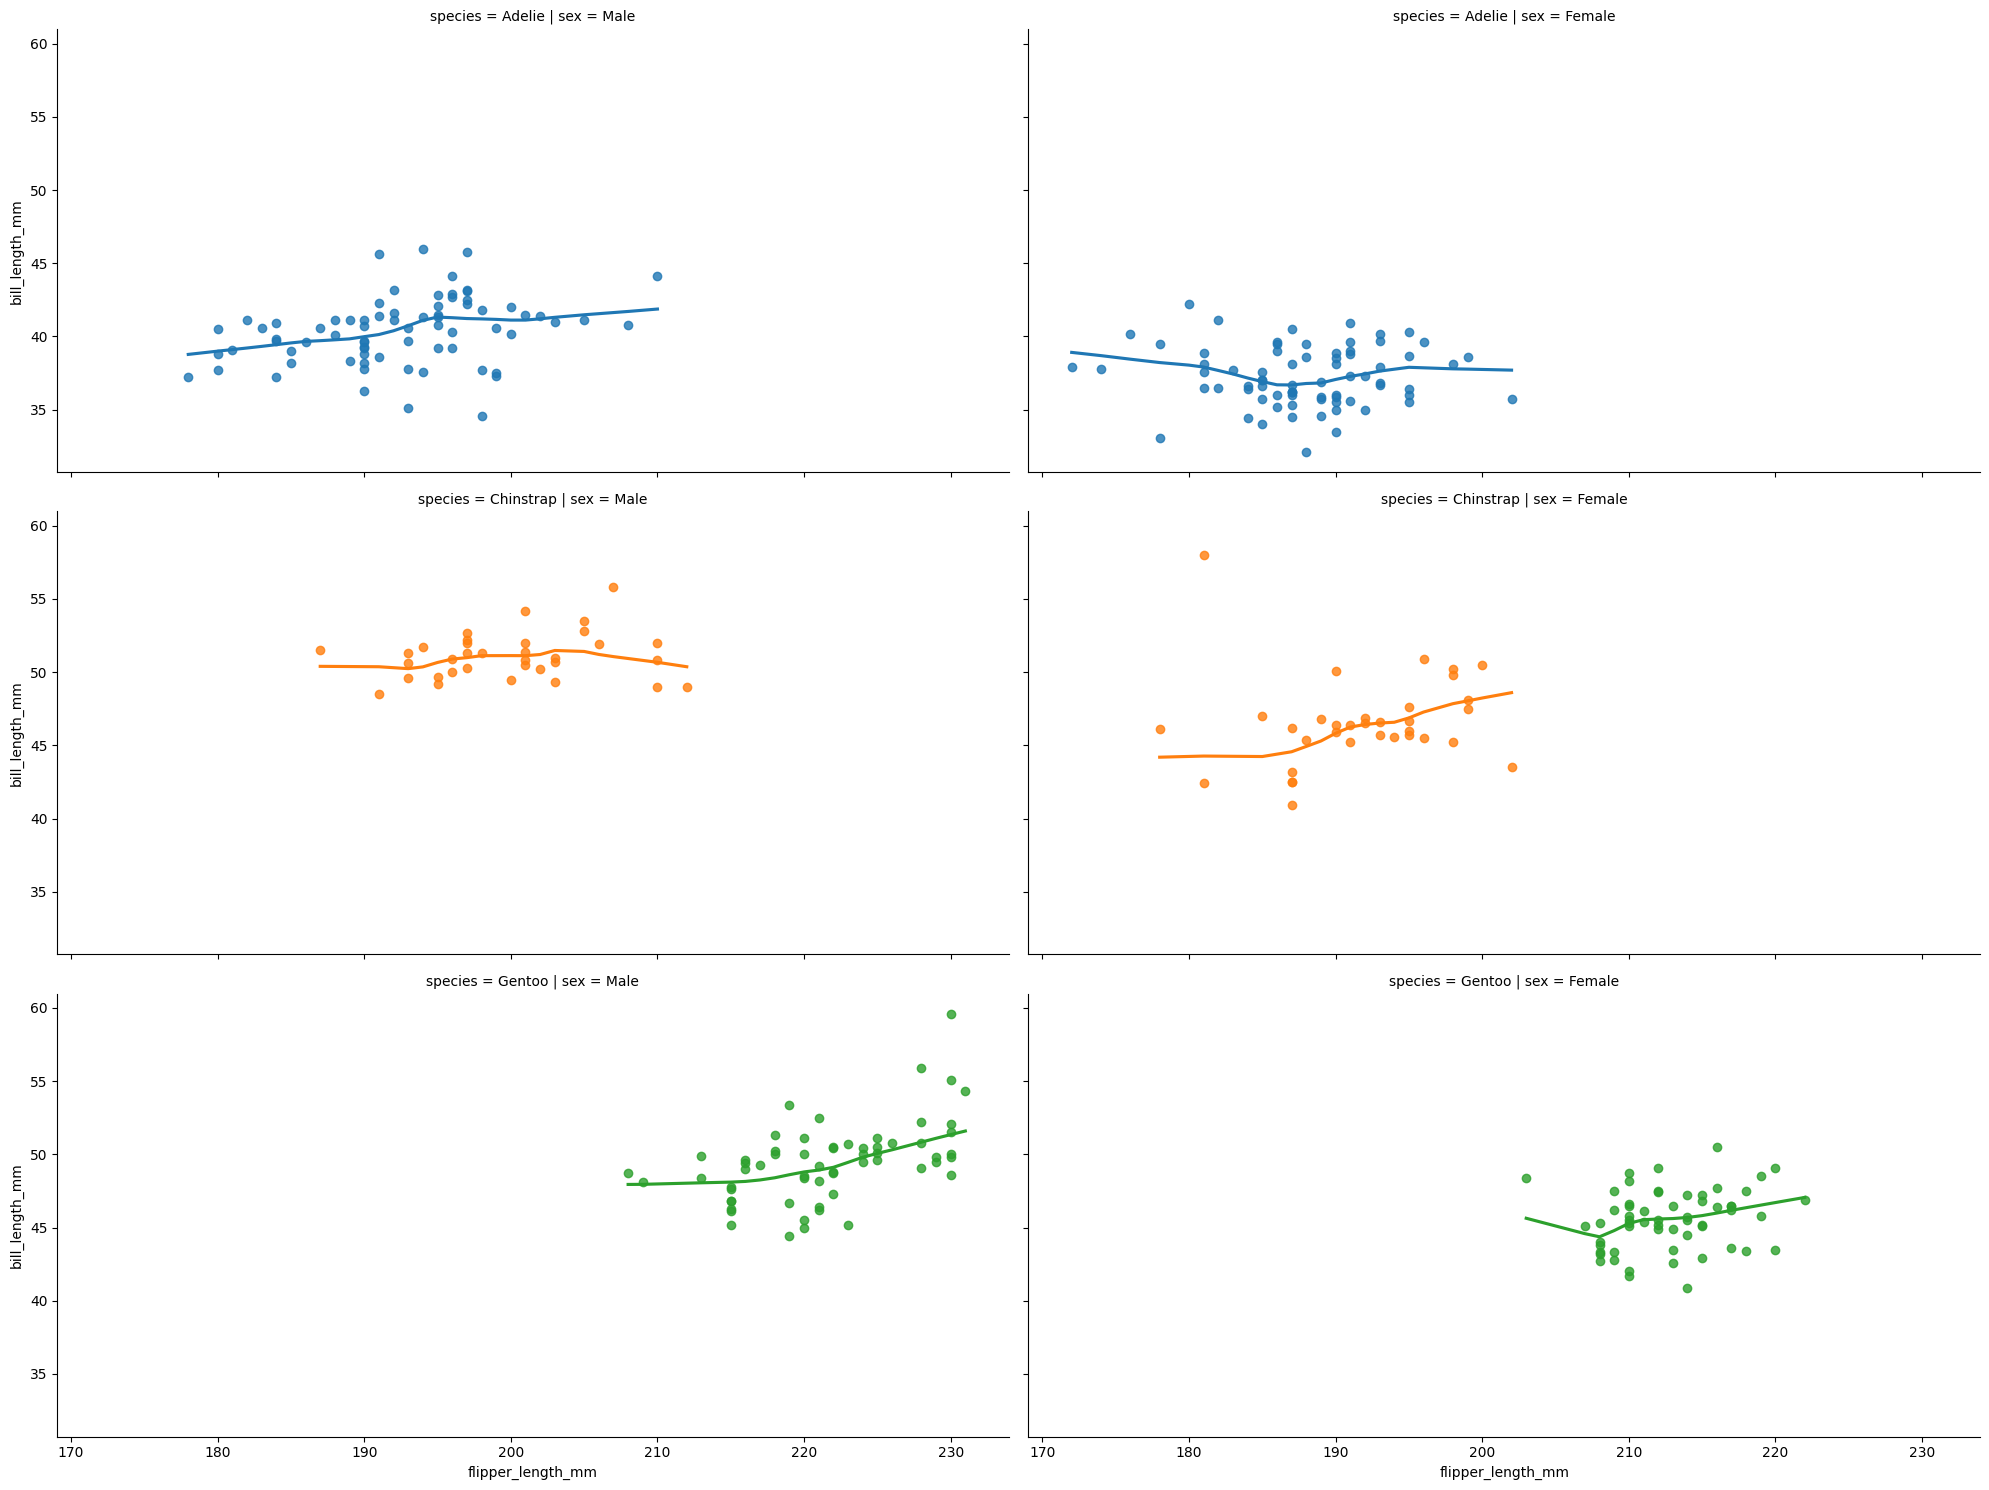

In [99]:
sns.lmplot(x = "flipper_length_mm", y = "bill_length_mm", lowess = True,
           row = "species", col = "sex",
           aspect = 2, hue = "species", data = penguins);

## Regression related

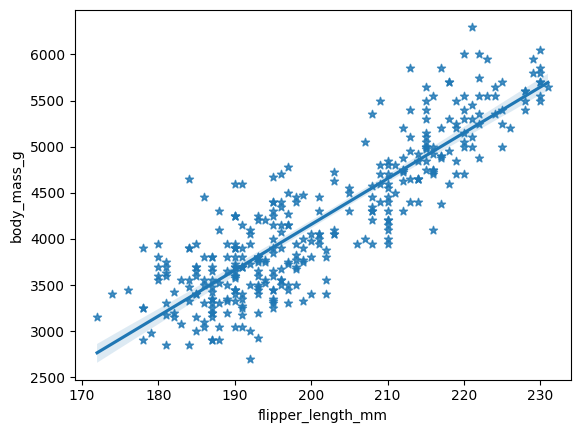

In [37]:
sns.regplot(x = "flipper_length_mm", y = "body_mass_g", 
            marker = "*", data = penguins);

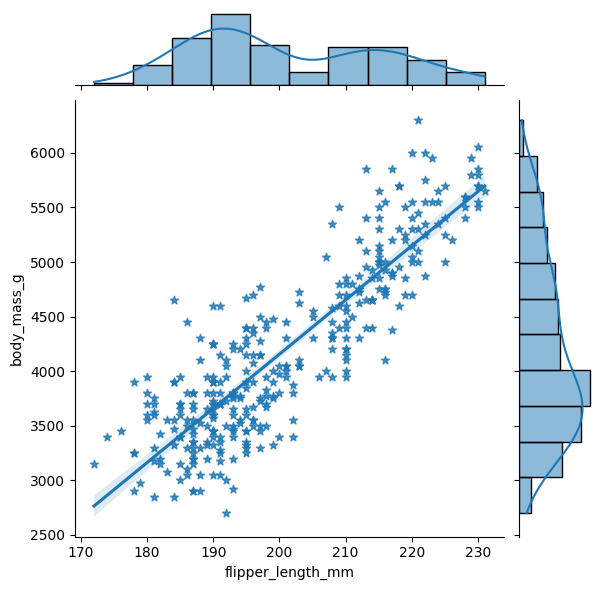

In [38]:
sns.jointplot(x = "flipper_length_mm", y = "body_mass_g", 
              marker = "*", data = penguins, kind='reg');

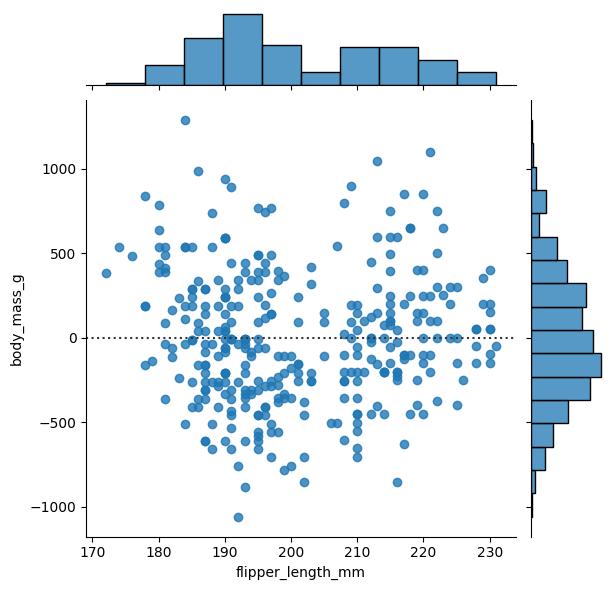

In [39]:
sns.jointplot(x = "flipper_length_mm", y = "body_mass_g", 
              data = penguins, kind='resid');

## Fitting basic statistical models

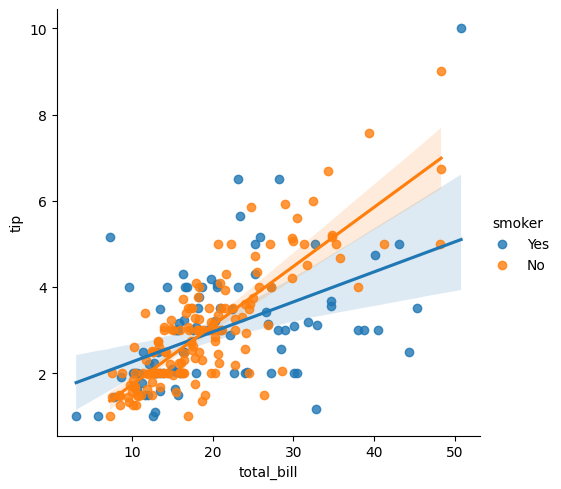

In [43]:
sns.lmplot(x="total_bill", y="tip",
           hue = "smoker", data=tips);

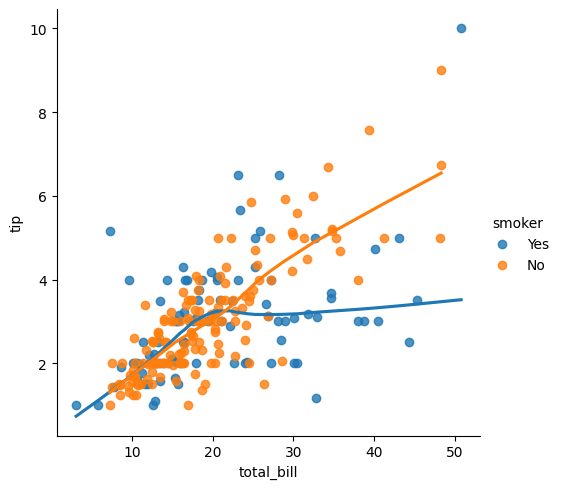

In [41]:
sns.lmplot(x="total_bill", y="tip", 
           hue = "smoker", 
           data=tips, lowess=True);

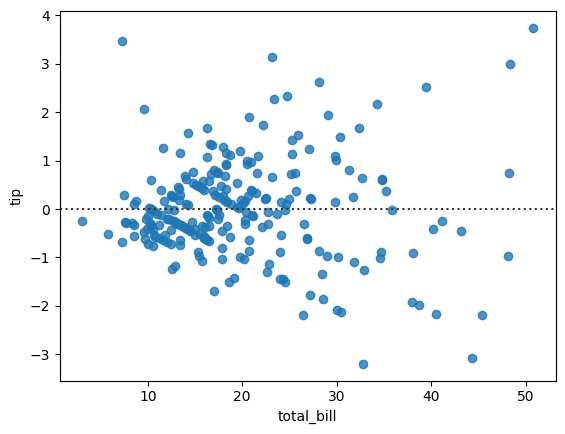

In [42]:
sns.residplot(x="total_bill", y="tip", 
              data=tips);

<h1> Statistics 21 <br/> Have an excellent weekend! </h1>

<script>
    setBackgroundImage('Window1.jpg', 'black');
</script>